In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
df = pd.read_csv("C:\\Users\\Devrim\\Desktop\\NO.csv")


# Ben burda data setinin çıkış kısmını Numara diye değiştirdim ve ilk 40 değerlerini ilk 20 10 ve kalan 20 tane 30 nolu olacak 
#Ve bunu tahmin ettirmeye çalışaçağım.
#özellik 2 ve özellik 4 kullanacağım
df

,Unnamed: 0,ozellik-1,ozellik-2,ozellik-3,ozellik-4,ozellik-5,ozellik-6,Numara
0,0,-7.435244,-4.174864,8.681144,0.668920,-6.065572,-2.184625,10
1,1,8.391229,-9.339414,-0.708129,1.740147,-3.413167,-7.336959,10
2,2,-5.634696,-3.565606,9.664936,2.732507,-6.960467,-0.873356,10
3,3,-6.330259,-3.825660,9.589396,0.917399,-6.954611,-1.565933,10
4,4,-5.836894,-4.262500,11.135290,0.627801,-6.747799,-1.749781,10
...,...,...,...,...,...,...,...,...
93,93,8.503909,-9.336053,-0.875796,1.850976,-4.714561,-5.387236,1
94,94,-7.164674,-4.588734,10.326705,1.055966,-6.221009,-3.411520,0
95,95,8.095334,-9.621382,0.935680,3.334007,-4.308569,-7.683909,1
96,96,-6.126117,-3.855354,10.318827,2.963437,-6.576240,-2.539617,0


In [116]:

cikis = df.iloc[0:40,7].values
print(cikis.shape)
print("**********************************************************************")
cikis

(40,)
**********************************************************************


array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30], dtype=int64)

In [131]:

cikis1 = np.where(df.Numara[:40]==10,-1,1)  #Numaranın ilk  40 değerini aldım ve eğer 10 ise -1  30 ise 1 yazdırsın dedim
giris = df.iloc[0:40, [1,3]].values
cikis1

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1])

In [132]:
giris   
#Girişler özellik-2 ve özellik-4 alacaktır.

array([[-7.43524377,  8.68114435],
       [ 8.39122887, -0.70812855],
       [-5.63469574,  9.66493635],
       [-6.330259  ,  9.58939558],
       [-5.8368937 , 11.13529022],
       [-6.72197659, 11.9643459 ],
       [ 7.548126  , -2.2496755 ],
       [10.52098407, -2.4496623 ],
       [-7.61074121, 10.34408255],
       [ 8.37709095, -2.06797765],
       [-7.50887341,  9.9411184 ],
       [-6.4717049 ,  9.14907423],
       [-8.01097964,  9.81097827],
       [-7.06373055,  9.83082994],
       [-7.52849983, 10.96420326],
       [ 9.66840596, -0.21167206],
       [-7.49654802,  9.5318149 ],
       [ 8.29553454, -0.74963515],
       [ 8.55205916,  0.49645642],
       [-5.96359139,  7.72927228],
       [ 9.31595072, -0.67337805],
       [ 9.31102223, -1.22362052],
       [ 8.97382371, -1.69641468],
       [-7.09412782, 10.83932461],
       [ 9.33018383, -2.50542805],
       [ 8.94323632, -0.40898249],
       [-5.43279479,  9.28255652],
       [10.2023039 , -1.33533362],
       [ 9.27284482,

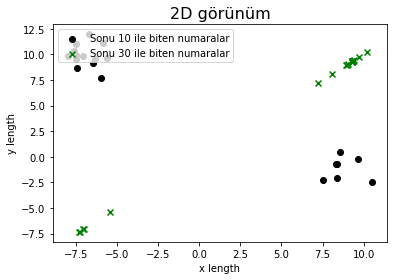

In [143]:
plt.title('2D görünüm', fontsize=16)

plt.scatter(giris[:20, 0], giris[:20, 1], color='black', marker='o', label='Sonu 10 ile biten numaralar')
plt.scatter(giris[20:40, 0], giris[20:40, -0], color='green', marker='x', label='Sonu 30 ile biten numaralar')
plt.xlabel('x length')
plt.ylabel('y length')
plt.legend(loc='upper left')

plt.show()

In [157]:
class Perceptron(object): 
    def __init__(self, ogrenme_orani=0.1, iter_sayisi=10):
        self.ogrenme_orani = ogrenme_orani
        self.iter_sayisi = iter_sayisi

    def ogren(self, X, y):
        
        self.w = np.zeros(1 + X.shape[1])
        #self.w = np.random.rand((1 + X.shape[1])) 
        self.hatalar = []
        for _ in range(self.iter_sayisi):
            hata = 0
            for xi, hedef in zip(X, y):
                degisim = self.ogrenme_orani * (hedef - self.tahmin(xi))
                self.w[1:] += degisim * xi
                self.w[0] += degisim
                hata += int(degisim != 0.0)
            self.hatalar.append(hata)
        return self

    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def tahmin(self, x):
        return np.where(self.net_input(x) >0.0, 1, -1)

In [158]:
siniflandirici = Perceptron(ogrenme_orani=0.1, iter_sayisi=10)

In [159]:
siniflandirici.ogren(giris, cikis1)

In [160]:
siniflandirici.w

array([-1.2       ,  1.59738425,  1.80715881])

In [161]:
siniflandirici.hatalar

[5, 13, 7, 12, 9, 12, 9, 14, 14, 13]

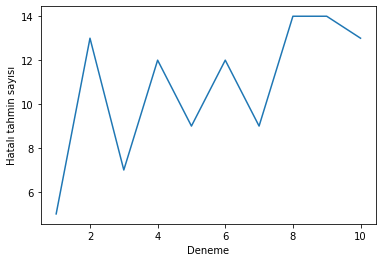

In [162]:
plt.plot(range(1, len(siniflandirici.hatalar) + 1), siniflandirici.hatalar)
plt.xlabel('Deneme')
plt.ylabel('Hatalı tahmin sayısı')
plt.show()


#görüldüğü gibi hata 0 ra inmiyor nedeni ise girişe verilen karmaşık değerlerden nasıl tahmin bir değer çıkacak belli değil

In [353]:
df2 = pd.read_csv("C:\\Users\\Devrim\\Desktop\\baska.csv")
df2

,0,1,2,3,Numara
0,4.9,3.0,1.4,0.2,10
1,4.7,3.2,1.3,0.2,10
2,4.6,3.1,1.5,0.2,10
3,5.0,3.6,1.4,0.2,10
4,5.4,3.9,1.7,0.4,10
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [366]:
cikis3 = df2.iloc[0:100, 4].values
cikis3 = np.where(cikis3== '10', -1, 1)
giris1 = df2.iloc[0:40, [0, 2]].values

In [367]:
giris1

array([[4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3]])

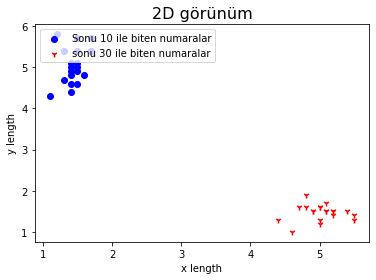

In [448]:
plt.title('2D görünüm', fontsize=16)

plt.scatter(giris1[:20, 1], giris1[:20, 0], color='blue', marker='o', label='Sonu 10 ile biten numaralar')
plt.scatter(giris1[20:40, 0], giris1[20:40, -1], color='red', marker='1', label='sonu 30 ile biten numaralar')
plt.xlabel('x length')
plt.ylabel('y length')
plt.legend(loc='upper left')

plt.show()
#Sınıflandırmaları yaptık 

In [455]:
class Perceptron(object): 
    def __init__(self, ogrenme_orani=0.2, iter_sayisi=50):
        self.ogrenme_orani = ogrenme_orani
        self.iter_sayisi = iter_sayisi

    def ogren(self, X, y):
        
        self.w = np.zeros(1 + X.shape[1])
        #self.w = np.random.rand((1 + X.shape[1])) 
        self.hatalar = []
        for _ in range(self.iter_sayisi):
            hata = 0
            for xi, hedef in zip(X, y):
                degisim = self.ogrenme_orani * (hedef - self.tahmin(xi))
                self.w[1:] += degisim * xi
                self.w[0] += degisim
                hata += int(degisim != 0.0)
            self.hatalar.append(hata)
        return self

    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def tahmin(self, x):
        return np.where(self.net_input(x) >=0.0, 1, -1)

In [456]:
siniflandirici2 = Perceptron(ogrenme_orani=0.2, iter_sayisi=50)

In [457]:
siniflandirici2.ogren(giris1, cikis3)

In [458]:
siniflandirici2.w

array([-0.8 ,  0.32,  0.8 ])

In [459]:
siniflandirici2.hatalar


[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2]

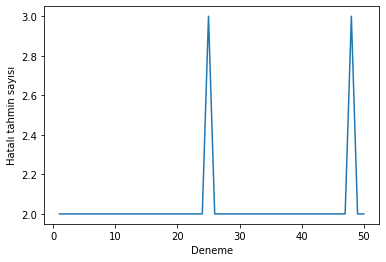

In [460]:
plt.plot(range(1, len(siniflandirici2.hatalar) + 1), siniflandirici2.hatalar)
plt.xlabel('Deneme')
plt.ylabel('Hatalı tahmin sayısı')
plt.show()

#2 hatanın altına inmiyor 